In [2]:
import snscrape.modules.twitter as sntwitter

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import re 

In [9]:
import scipy

In [10]:
from scipy import displacy

ImportError: cannot import name 'displacy' from 'scipy' (C:\Users\ameer\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py)

In [14]:
from scipy import displacy

ImportError: cannot import name 'displacy' from 'scipy' (C:\Users\ameer\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py)

In [15]:
import spacy

In [16]:
from spacy import displacy

In [17]:
from collections import Counter


In [18]:
import en_core_web_sm

In [19]:
nlp = en_core_web_sm.load()

In [93]:
# Setting variables to be used below
maxTweets = 5000

# Creating list to append tweet data to
tweets_list = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('(#SpotifyWrapped) lang:en until:2022-12-08 since:2020-01-01').get_items()):
    if i>maxTweets:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.username])

C:\Users\ameer\AppData\Local\Temp\ipykernel_37996\2000827756.py:11: FutureWarning: username is deprecated, use user.username instead
  tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.username])


"# Setting variables to be used below\nmaxTweets = 500000\n\n# Creating list to append tweet data to\ntweets_list = []\n\n# Using TwitterSearchScraper to scrape data and append tweets to list\nfor i,tweet in enumerate(sntwitter.TwitterSearchScraper('horribleBosses since:2022-03-21 until:2022-03-30').get_items()):\n    if i>maxTweets:\n        break\n    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.username])"

In [94]:

#Creating a dataframe from the tweets list above


df = pd.DataFrame(tweets_list, columns=['datetime', 'tweet_Id', 'text', 'Username'])

# Display first 5 entries from dataframe
df.head()

,datetime,tweet_Id,text,Username
0,2022-12-07 23:59:57+00:00,1600641292366938112,I may or may not have music in my soul\n\nThis...,AbainTN
1,2022-12-07 23:59:27+00:00,1600641166273224705,Thanks Granger Smith for spending 869 minutes ...,patriotcowgirl2
2,2022-12-07 23:59:23+00:00,1600641152080044032,@SpotifyAfrica @asakemusik HANDS UP IF YOU HAV...,Anerdsays
3,2022-12-07 23:59:02+00:00,1600641062221090817,Thanks Watsky for spending 251 minutes with me...,thewisestbrooke
4,2022-12-07 23:58:59+00:00,1600641051353845760,"Thanks @skilletmusic for spending 1,054 minute...",VictoriaJackm22


In [95]:

# write the dataframe into a csv 
df.to_csv('tweets.csv')


In [96]:
# read data into a dataframe
data =pd.read_csv('tweets.csv')

In [97]:

data.shape

(5001, 5)

In [98]:
#view the first few lines of the dataframe
data.head()

,Unnamed: 0,datetime,tweet_Id,text,Username
0,0,2022-12-07 23:59:57+00:00,1600641292366938112,I may or may not have music in my soul\n\nThis...,AbainTN
1,1,2022-12-07 23:59:27+00:00,1600641166273224705,Thanks Granger Smith for spending 869 minutes ...,patriotcowgirl2
2,2,2022-12-07 23:59:23+00:00,1600641152080044032,@SpotifyAfrica @asakemusik HANDS UP IF YOU HAV...,Anerdsays
3,3,2022-12-07 23:59:02+00:00,1600641062221090817,Thanks Watsky for spending 251 minutes with me...,thewisestbrooke
4,4,2022-12-07 23:58:59+00:00,1600641051353845760,"Thanks @skilletmusic for spending 1,054 minute...",VictoriaJackm22


In [99]:
#view first 20 rows of data
data.text[0:20]

0     I may or may not have music in my soul\n\nThis...
1     Thanks Granger Smith for spending 869 minutes ...
2     @SpotifyAfrica @asakemusik HANDS UP IF YOU HAV...
3     Thanks Watsky for spending 251 minutes with me...
4     Thanks @skilletmusic for spending 1,054 minute...
5     Thanks @weareoneexo for spending 3,057 minutes...
6     Thanks Scrubs for being my top podcast on @Spo...
7     Thanks @billieeilish for spending 6,157 minute...
8     Thanks Ice Nine Kills for spending 6,644 minut...
9     Thanks The Temper Trap for spending 680 minute...
10    Thanks @dadju for spending 3,695 minutes with ...
11    Thanks Jesse McCartney for spending 1,531 minu...
12    Thanks Fred again.. for spending 4,717 minutes...
13    Thanks Dave Tate's Table Talk for being my top...
14    Thanks Unsolved Murders: True Crime Stories fo...
15    Thanks Dan Bongino Show for being my top podca...
16    Thanks @mcrofficial for spending 17,542 minute...
17    Thanks @cigsaftersexx for spending 9,577 m

In [100]:

#convert the datetime to date
data.datetime= pd.to_datetime(data.datetime).dt.date

In [101]:

# view the data frame again
data.head()

,Unnamed: 0,datetime,tweet_Id,text,Username
0,0,2022-12-07,1600641292366938112,I may or may not have music in my soul\n\nThis...,AbainTN
1,1,2022-12-07,1600641166273224705,Thanks Granger Smith for spending 869 minutes ...,patriotcowgirl2
2,2,2022-12-07,1600641152080044032,@SpotifyAfrica @asakemusik HANDS UP IF YOU HAV...,Anerdsays
3,3,2022-12-07,1600641062221090817,Thanks Watsky for spending 251 minutes with me...,thewisestbrooke
4,4,2022-12-07,1600641051353845760,"Thanks @skilletmusic for spending 1,054 minute...",VictoriaJackm22


In [102]:

#group counts of tweets by date
dt=data.groupby('Username').size()
dt

Username
007KaosJR          1
02shofia__         1
06kinger           1
0Silencer          1
0fficialLT         1
                  ..
zsu_zsus_petals    1
ztj1989            1
zweidiereisen      1
zyanul             1
zyphen0            1
Length: 4694, dtype: int64

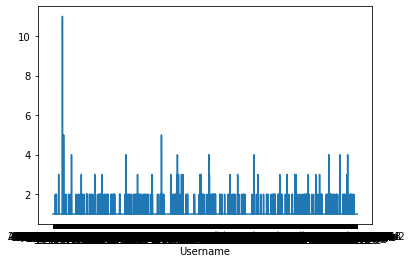

In [103]:

#plot linechat of tweets by day
sns.lineplot(err_style="bars",
			data = dt);

In [104]:

#clean the tweets and add a new column of the clean data
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    #tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI['en']) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    return tweet
data['clean'] = data['text'].map(lambda x: cleaner(x))

In [105]:

#view the new data frame
data.head()

,Unnamed: 0,datetime,tweet_Id,text,Username,clean
0,0,2022-12-07,1600641292366938112,I may or may not have music in my soul\n\nThis...,AbainTN,I may or may not have music in my soul This ye...
1,1,2022-12-07,1600641166273224705,Thanks Granger Smith for spending 869 minutes ...,patriotcowgirl2,Thanks Granger Smith for spending 869 minutes ...
2,2,2022-12-07,1600641152080044032,@SpotifyAfrica @asakemusik HANDS UP IF YOU HAV...,Anerdsays,HANDS UP IF YOU HAVE A PREMIUM SPOTIFY ACCOUNT...
3,3,2022-12-07,1600641062221090817,Thanks Watsky for spending 251 minutes with me...,thewisestbrooke,Thanks Watsky for spending 251 minutes with me...
4,4,2022-12-07,1600641051353845760,"Thanks @skilletmusic for spending 1,054 minute...",VictoriaJackm22,"Thanks for spending 1,054 minutes with me in 2..."


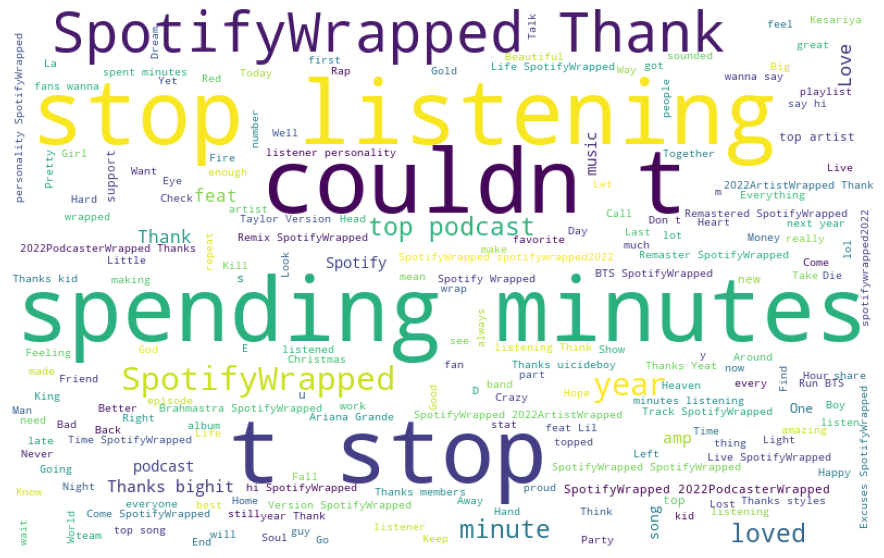

In [106]:

#create a wordcloud to view the most used words in the clean tweets

all_words = ' '.join([text for text in data['clean']])
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()